# EDA on dataset and preprocessing

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set(style="darkgrid")

### Reading Extracted Data

In [2]:
# df = pd.read_csv("data4.csv")
df = pd.read_csv("flair_dataset.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

Flair                                              Title    Created_at  \
0  AskIndia  Attractive men, what type of attention do you ...  1.565725e+09   
1  AskIndia  [askindia] My brothers bank account was hacked...  1.569682e+09   
2  AskIndia                     [AskIndia] What song is this ?  1.565493e+09   
3  AskIndia  [AskIndia][Serious] Is it worth attempting imm...  1.561382e+09   
4  AskIndia  [AskIndia] What are some cheap but reliable an...  1.572552e+09   

   Score                                        Url_address  \
0     20  https://www.reddit.com/r/india/comments/cprtaa...   
1     37  https://www.reddit.com/r/india/comments/dacmel...   
2      5  https://www.reddit.com/r/india/comments/comakt...   
3     56  https://www.reddit.com/r/india/comments/c4ilk5...   
4     21  https://www.reddit.com/r/india/comments/dpmgmj...   

                                                Body            Author  \
0  xposted from /r/askmen, posted here because In...  sleepless_indian   
1  My brother received bunch of SMS this morning ...      prtthrowaway   
2  Often when I think of home there is a particul...          lockworm   
3  Title. \n\nFrom what I understand based on arm...       aashish2137   
4  I won't play games or edit videos.\n\nI will u...       advice2019-   

   num_comments                                  combined_comments  
0            21    My mom says I'm good looking. Can I answer? ...  
1            64    I ll copy paste one of my previous comments-...  
2             6    hamari adhoori kahani (aka bheegi bheegi si ...  
3           115    NRI with a fairly neutral opinion here.\n\nS...  
4            25    There is no way you can future proof anythin...

### Converting created date in datetime formate. This helps us to analyse post based on dates.

In [3]:
df['Created_at'] = df['Created_at'].apply(lambda x : dt.datetime.fromtimestamp(x))
df.head()

Flair                                              Title  \
0  AskIndia  Attractive men, what type of attention do you ...   
1  AskIndia  [askindia] My brothers bank account was hacked...   
2  AskIndia                     [AskIndia] What song is this ?   
3  AskIndia  [AskIndia][Serious] Is it worth attempting imm...   
4  AskIndia  [AskIndia] What are some cheap but reliable an...   

           Created_at  Score  \
0 2019-08-14 00:59:47     20   
1 2019-09-28 20:17:34     37   
2 2019-08-11 08:46:23      5   
3 2019-06-24 18:41:18     56   
4 2019-11-01 01:27:04     21   

                                         Url_address  \
0  https://www.reddit.com/r/india/comments/cprtaa...   
1  https://www.reddit.com/r/india/comments/dacmel...   
2  https://www.reddit.com/r/india/comments/comakt...   
3  https://www.reddit.com/r/india/comments/c4ilk5...   
4  https://www.reddit.com/r/india/comments/dpmgmj...   

                                                Body            Author  \
0  xposted from /r/askmen, posted here because In...  sleepless_indian   
1  My brother received bunch of SMS this morning ...      prtthrowaway   
2  Often when I think of home there is a particul...          lockworm   
3  Title. \n\nFrom what I understand based on arm...       aashish2137   
4  I won't play games or edit videos.\n\nI will u...       advice2019-   

   num_comments                                  combined_comments  
0            21    My mom says I'm good looking. Can I answer? ...  
1            64    I ll copy paste one of my previous comments-...  
2             6    hamari adhoori kahani (aka bheegi bheegi si ...  
3           115    NRI with a fairly neutral opinion here.\n\nS...  
4            25    There is no way you can future proof anythin...

In [4]:
# Some Information about dataset(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Flair              2765 non-null   object        
 1   Title              2765 non-null   object        
 2   Created_at         2765 non-null   datetime64[ns]
 3   Score              2765 non-null   int64         
 4   Url_address        2765 non-null   object        
 5   Body               1584 non-null   object        
 6   Author             2765 non-null   object        
 7   num_comments       2765 non-null   int64         
 8   combined_comments  2765 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 194.5+ KB


### Getting sum of all null values for each column in dataset. And ploting heatmap for that.
Helps Us to see NA values visually

Flair                   0
Title                   0
Created_at              0
Score                   0
Url_address             0
Body                 1181
Author                  0
num_comments            0
combined_comments       0
dtype: int64


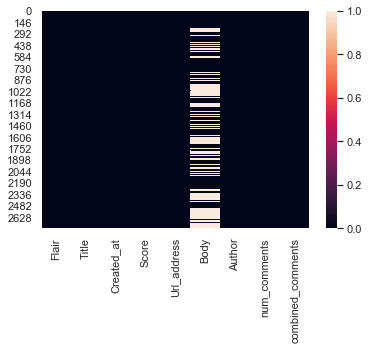

In [5]:
print(df.isnull().sum())
sns.heatmap(df.isnull())

### Filling null values with `" "`, so that it will be easier in data modeling. And finally ploting heatmap.

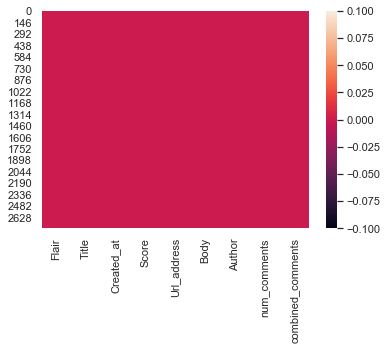

In [6]:
df.Body.fillna('nan', inplace=True)
sns.heatmap(df.isnull())

### Simple Plot to visualize each Flair count.

Coronavirus           251
Politics              247
Food                  242
AskIndia              235
Scheduled             234
Business/Finance      233
Sports                231
Photography           222
Science/Technology    221
Policy/Economy        220
Non-Political         216
AMA                   213
Name: Flair, dtype: int64


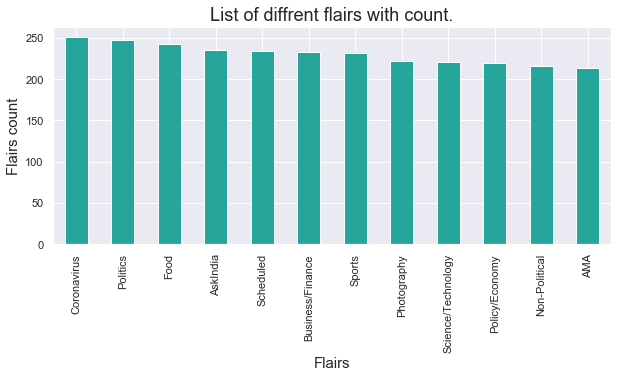

In [70]:
print(df.Flair.value_counts())
plt.figure(figsize=(10,4))
plt.title("List of diffrent flairs with count.", fontsize=18)
plt.xlabel("Flairs", fontsize=15)
plt.ylabel("Flairs count", fontsize=15)
df.Flair.value_counts().plot(kind='bar', color='#26a69a')

### Comment count for each flair.
By plotting we came to know that AskIndia is most popular among people, as name suggest people ask question and others give answer.

In [71]:
# Writing flairs in list form.
chosen_flair = [ 'Sports', 'Scheduled', 'Business/Finance', 'Food', 'Politics', 'Policy/Economy', 'Science/Technology', 'Photography', 'Non-Political', 'AskIndia', 'Coronavirus', 'AMA']

Flair                No. of comments 
Sports               8708            
Scheduled            8701            
Business/Finance     6943            
Food                 12585           
Politics             13512           
Policy/Economy       8272            
Science/Technology   12184           
Photography          5188            
Non-Political        3942            
AskIndia             36691           
Coronavirus          36643           
AMA                  35066           


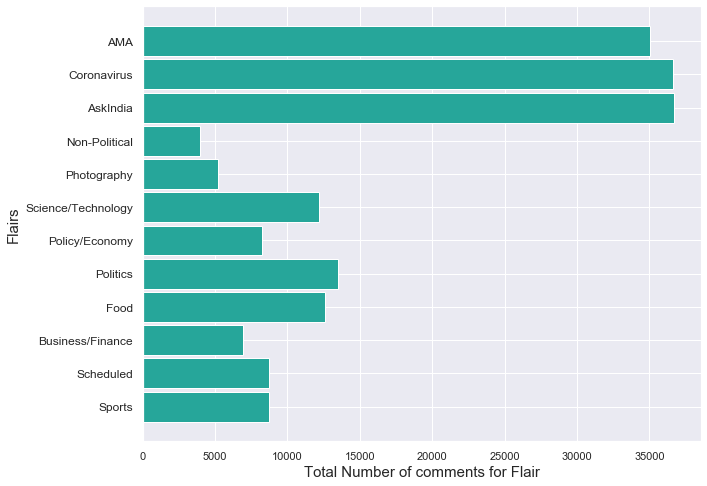

In [72]:
print("{:<20} {:<15} ".format('Flair', 'No. of comments'))
total_no_of_comments = {}
for flair in chosen_flair:
    total_no_of_comments[flair] = df[df.Flair == flair]['num_comments'].sum()
    print("{:<20} {:<15} ".format(flair, df[df.Flair == flair]['num_comments'].sum()))
plt.figure(figsize =(10,8))
plt.barh(np.arange(len(chosen_flair)), total_no_of_comments.values(), color='#26a69a', height=0.9)
plt.yticks(np.arange(len(total_no_of_comments)),list(total_no_of_comments.keys()), fontsize=12)
plt.xlabel("Total Number of comments for Flair", fontsize=15)
plt.ylabel("Flairs", fontsize=15)
plt.show()

### Ploting Number of Words in Title. This give general overview of length of title.
Average number of words for Title in post is around 82 with 300 as max length and 6 as min number of w

In [76]:
length = df.Title.str.len()
_sum = 0
for i in length:
    _sum+=i
print("{:<20} {:<15} ".format('Average No of words in Title ', _sum//len(length)))
print("{:<20} {:<15} ".format('Max No of words in Title ', max(length)))
print("{:<20} {:<15} ".format('Min No of words in Title ', min(length)))

Average No of words in Title  82              
Max No of words in Title  300             
Min No of words in Title  6               


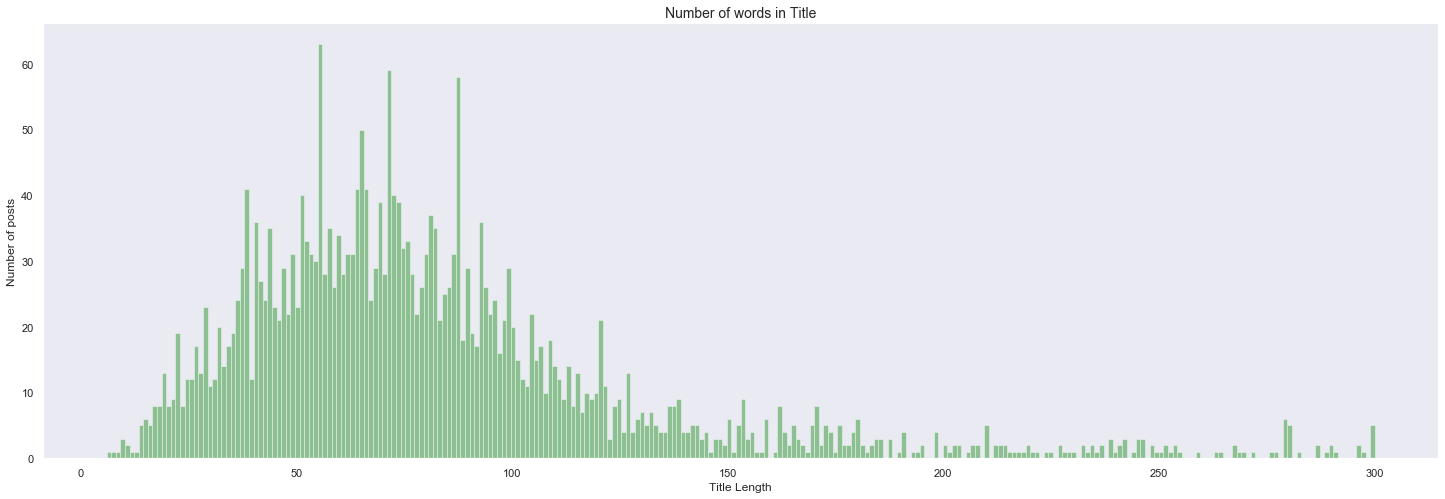

In [86]:
length = df.Title.str.len()
plt.figure(figsize =(25,8))
plt.grid(False)
sns.distplot(length, bins=len(length)//10, color="green",kde = False)
plt.title("Number of words in Title", fontsize=14)
plt.xlabel("Title Length", fontsize=12)
plt.ylabel("Number of posts", fontsize=12)
plt.show()

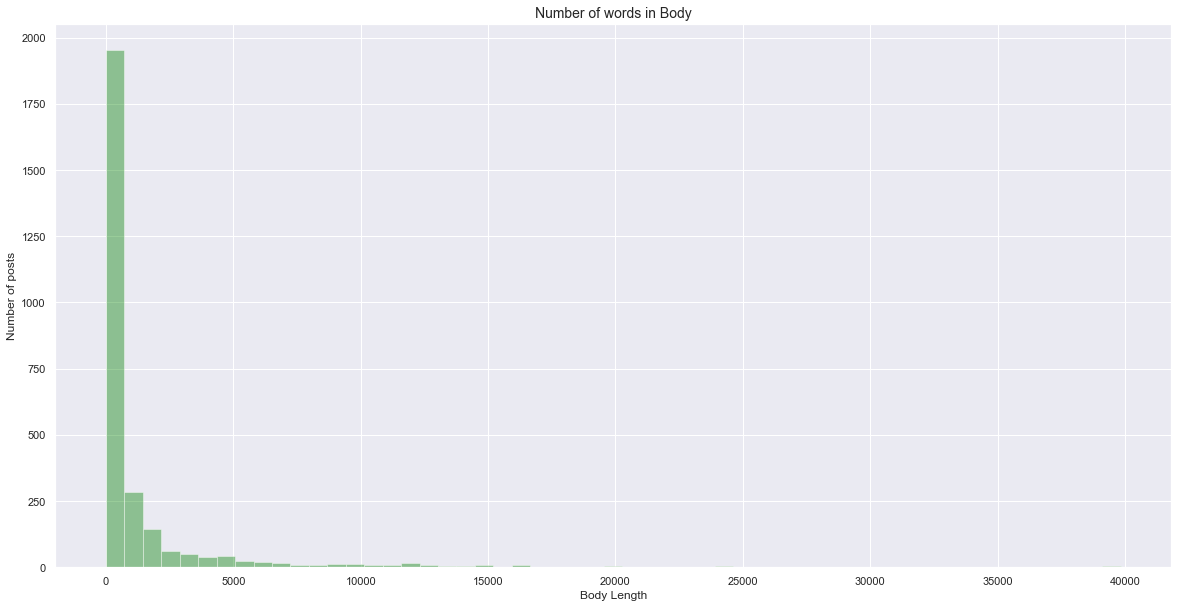

In [53]:
length = df.Body.str.len()
plt.figure(figsize =(20,10))
sns.distplot(length, bins=len(length)//50, color="green",kde = False)
plt.title("Number of words in Body", fontsize=14)
plt.xlabel("Body Length", fontsize=12)
plt.ylabel("Number of posts", fontsize=12)
plt.show()

# Distribution of Sbmission with specific Flair over the Years.
From the plot shown below we can see that submission with given flairs are distributed over the years.  
- Some flair like `Coronavirus` which came in existance this year which does not exist before. 
- Some flair are topping the chart over others.  
From the above observation if we collect data randomly or based on date than it would be imbalanced. So we took same amount of submission from each Flair catogary for fairer calassification.

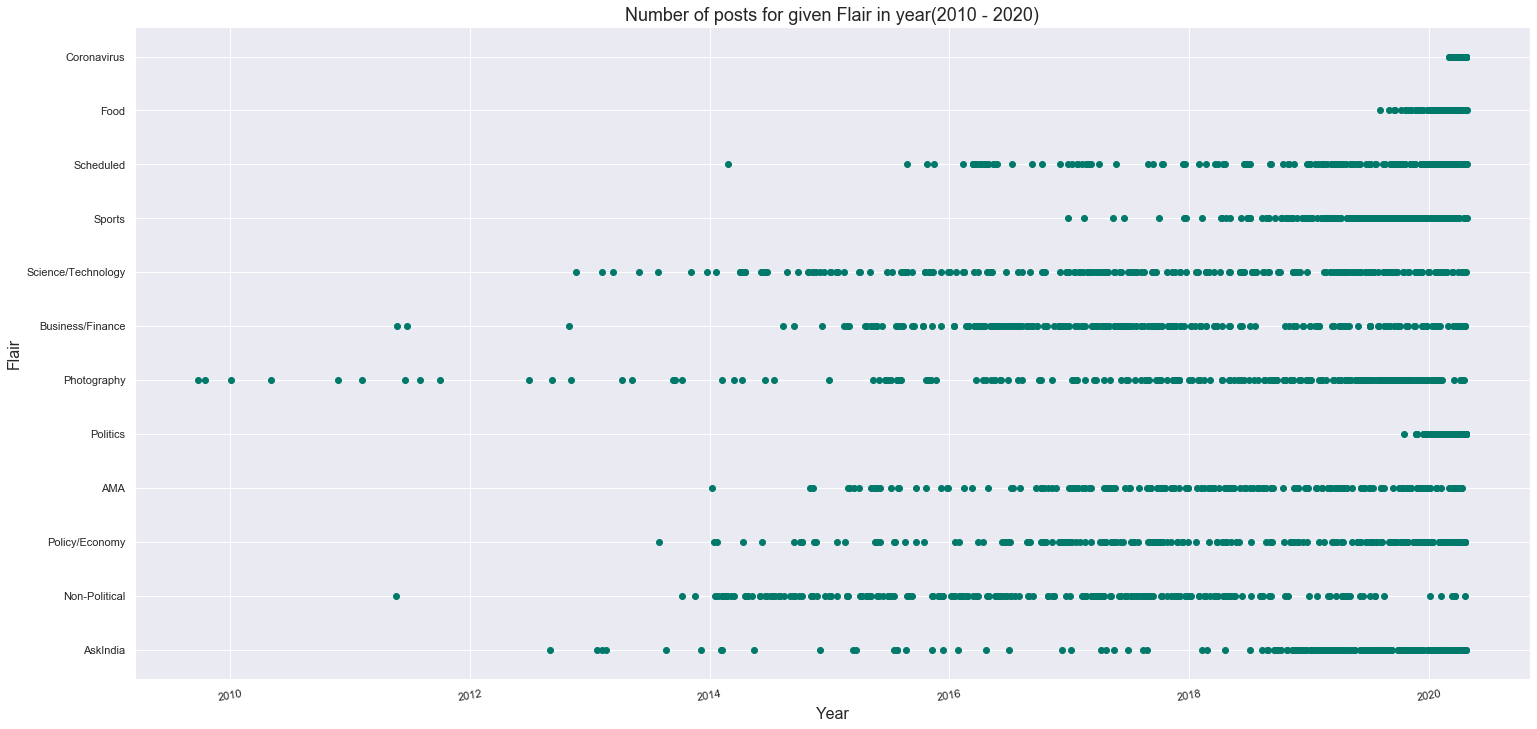

In [56]:
plt.figure(figsize =(25,12))
plt.plot_date(df.Created_at, df.Flair, color = "#00796b")
plt.xticks(rotation=10)
plt.title('Number of posts for given Flair in year(2010 - 2020)', fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Flair", fontsize=16)
plt.show()

## Cleaning Data.
 Natural text have a lot different sentex or special character. Which does no good for classificatio, we can remove than which in tern optimize our model. Similarly we need to remove maximum frequency n-grams which are generally known as stopword. We pass title, body and comments in the fuction below.

In [7]:
import nltk
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

replace_by_space = re.compile('[/(){}\[\]\|@,;]')
replace_symbol = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def column_cleanup(text):
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = replace_by_space.sub(' ', text) # replace certain symbols by space in text
    text = replace_symbol.sub('', text) # delete symbols from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove STOPWORDS from text
    return text

def _str(text):
      return str(text)

df['Title'] = df['Title'].apply(column_cleanup)
df['Body'] = df['Body'].apply(column_cleanup)
df['combined_comments'] = df['combined_comments'].apply(column_cleanup)
df['Title'] = df['Title'].apply(_str)
df['Body'] = df['Body'].apply(_str)
df['combined_comments'] = df['combined_comments'].apply(_str)

F:\Installed Software\Anaconda3\envs\tf_gpu\lib\site-packages\bs4\__init__.py:389: UserWarning: "https://youtu.be/kBvIqVr__C0" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [59]:
df.head(100)

Flair                                              Title  \
0   AskIndia  attractive men type attention receive others l...   
1   AskIndia      askindia brothers bank account hacked morning   
2   AskIndia                                      askindia song   
3   AskIndia  askindia serious worth attempting immigration ...   
4   AskIndia  askindia cheap reliable long lasting laptop mo...   
..       ...                                                ...   
95  AskIndia  askindia recently visited ahmedabad liked city...   
96  AskIndia        askindia voluntarily give income tax refund   
97  AskIndia  askindia reduce time takes get judgment court ...   
98  AskIndia  askindia think would next indian would looked ...   
99  AskIndia            askindia convince parents eat healthier   

            Created_at  Score  \
0  2019-08-14 00:59:47     20   
1  2019-09-28 20:17:34     37   
2  2019-08-11 08:46:23      5   
3  2019-06-24 18:41:18     56   
4  2019-11-01 01:27:04     21   
..                 ...    ...   
95 2020-02-14 08:00:01      5   
96 2020-02-07 18:31:28      4   
97 2020-02-14 05:31:33      3   
98 2020-01-13 03:27:29     12   
99 2020-02-01 15:43:36     14   

                                          Url_address  \
0   https://www.reddit.com/r/india/comments/cprtaa...   
1   https://www.reddit.com/r/india/comments/dacmel...   
2   https://www.reddit.com/r/india/comments/comakt...   
3   https://www.reddit.com/r/india/comments/c4ilk5...   
4   https://www.reddit.com/r/india/comments/dpmgmj...   
..                                                ...   
95  https://www.reddit.com/r/india/comments/f3edq1...   
96  https://www.reddit.com/r/india/comments/f05mos...   
97  https://www.reddit.com/r/india/comments/f3c2gw...   
98  https://www.reddit.com/r/india/comments/ennqf7...   
99  https://www.reddit.com/r/india/comments/ewz70q...   

                                                 Body            Author  \
0   xposted r askmen posted india socially cultura...  sleepless_indian   
1   brother received bunch sms morning around 3am ...      prtthrowaway   
2   often think home particular hindi pop song pla...          lockworm   
3   title understand based armchair research motiv...       aashish2137   
4   wont play games edit videosi use laptop web su...       advice2019-   
..                                                ...               ...   
95  please include views weather law order securit...         ishmael99   
96  add option return form willing donate income t...          satyasys   
97  knock door court justice almost every time hea...          satyasys   
98  tons happening india better worse myrade celeb...     bagofthoughts   
99  referring indian people aged 4060 hard time ex...          iHateBED   

    num_comments                                  combined_comments  
0             21  mom says im good looking answer yeah shes one ...  
1             64  copy paste one previous commentsaccording rbis...  
2              6  hamari adhoori kahani aka bheegi bheegi si hai...  
3            115  nri fairly neutral opinion heresome cons arent...  
4             25  way future proof anything best bet machine las...  
..           ...                                                ...  
95             5  yes try stay good side new wall reasons living...  
96            13  nope already get absolutely nothing return tax...  
97             4  deleted increase number session courts high co...  
98            13  kannan gopinathan clearly distinguished leader...  
99             9  might sound rude believe visit doctor health r...  

[100 rows x 9 columns]

# WordCloud  
 Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.  
 Here we are generating WordCloud for each Flair.  
[Refrence](https://www.geeksforgeeks.org/generating-word-cloud-python/)

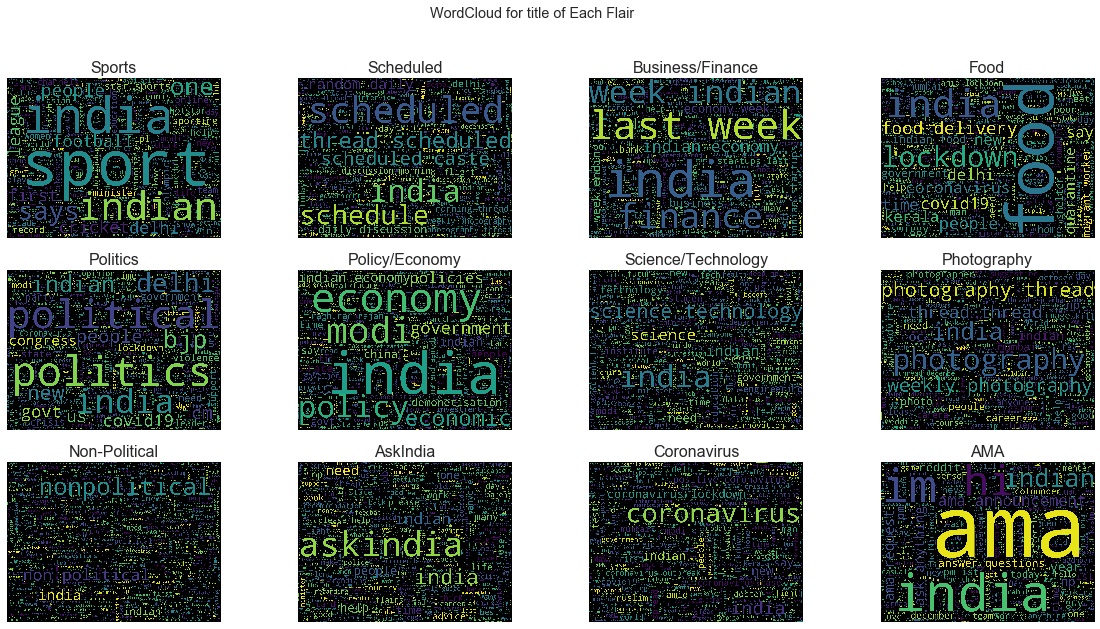

In [63]:
from wordcloud import WordCloud, STOPWORDS 
idx =0
jdx=0
fig, ax = plt.subplots(3, 4, figsize=(20,10))
for flair in chosen_flair:
    a = df['Title'][df.Flair == flair]
    comment_words = ''
    for val in a: 
        val = str(val) 
        tokens = val.split() 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
        comment_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 4000, height = 3000, max_words=1000).generate(str(comment_words))
    
    fig.suptitle('WordCloud for title of Each Flair')
    ax[idx,jdx].set_title(flair, fontsize= 16)
    ax[idx,jdx].grid(False)
    ax[idx,jdx].axis(False)
    ax[idx,jdx].imshow(wordcloud)                
    jdx+=1
    if(jdx>3):
        jdx=0
        idx+=1

# Finnaly we save the cleaned data in `.csv` file 

In [8]:
df.to_csv("flair_dataset.csv")